In [2]:
import numpy as np
import matplotlib.pyplot as plt
import hyperspy.api as hs
import os
import time
from skimage import transform
from cv2 import linearPolar, WARP_FILL_OUTLIERS

path_crops = '/home/rodrigo.souza/Documents/HRTEM/datasets/HRTEM_Fe3O4_T1_420kx/crops/'

# Performing FFT

In [3]:
rscrops = []
# ffts = []
# fshifts = []  # Need to include phase (fshift) for reconstruction later

sample_size = 2
for file_name in os.listdir(path_crops):
    crop = np.load(path_crops + file_name)
    rscrop = transform.resize(crop, (crop.shape[0] // sample_size, crop.shape[1] // sample_size), anti_aliasing=True) # resize funciona por bilinear interpolation. Anti_aliasing smooths out high-frequency components
    rscrop = rscrop.astype(np.float32)
    rscrops.append(rscrop)

    # fshift = np.fft.fftshift(np.fft.fft2(rscrop))
    # fft = np.abs(fshift)
    # ffts.append(fft) 
    # fshifts.append(fshift)

rscrops = np.array(rscrops)
# ffts = np.array(ffts)
# fftshifts = np.array(fshifts)
print(rscrops.shape)
# print(ffts.shape)

(13248, 220, 220)


In [4]:
# np.save('/home/rodrigo.souza/Documents/HRTEM/notebooks/new_outputs/ffts', ffts)
# np.save('/home/rodrigo.souza/Documents/HRTEM/notebooks/new_outputs/fshifts', fshifts)
np.save('/home/rodrigo.souza/Documents/HRTEM/notebooks/new_outputs/rscrops', rscrops)

In [3]:
# For py4dstem
s = hs.signals.Signal2D(ffts)
s

WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, falling back to non-accelerated implementation. (hyperspy.decorators:254)
WARNING | Hyperspy | Numba is not installed, fal

<Signal2D, title: , dimensions: (13248|220, 220)>

In [4]:
s.save('//home/rodrigo.souza/Documents/HRTEM/notebooks/new_outputs/' + 'ffts_circular_rs2_SVD', overwrite = True) # Para checagem posterior

# MSA (not necessary for now)

In [4]:
s.decomposition(
                True, # Nos exemplos, ele sempre faz isso
                algorithm = 'SVD'
                )

: 

In [44]:
s = hs.load('/home/ABTLUS/rodrigo.souza/HRTEM/notebooks/' + 'ffts_circular_rs2_SVD.hspy')
s

<Signal2D, title: , dimensions: (13248|220, 220)>

<Axes: title={'center': '\nPCA Scree Plot'}, xlabel='Principal component index', ylabel='Proportion of variance'>

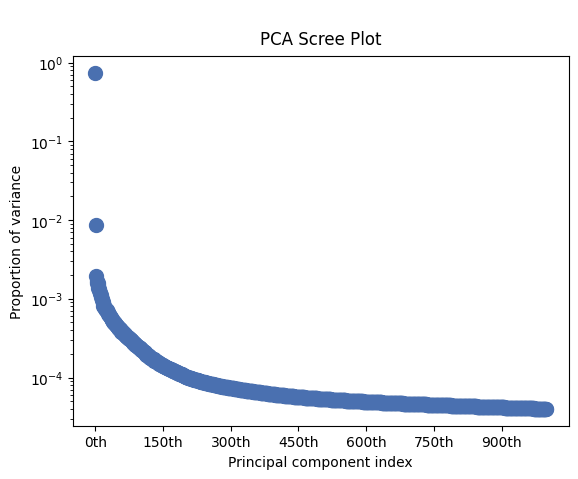

In [290]:
s.plot_explained_variance_ratio(
                                n=1000
                                # , threshold=0.000025
                                )

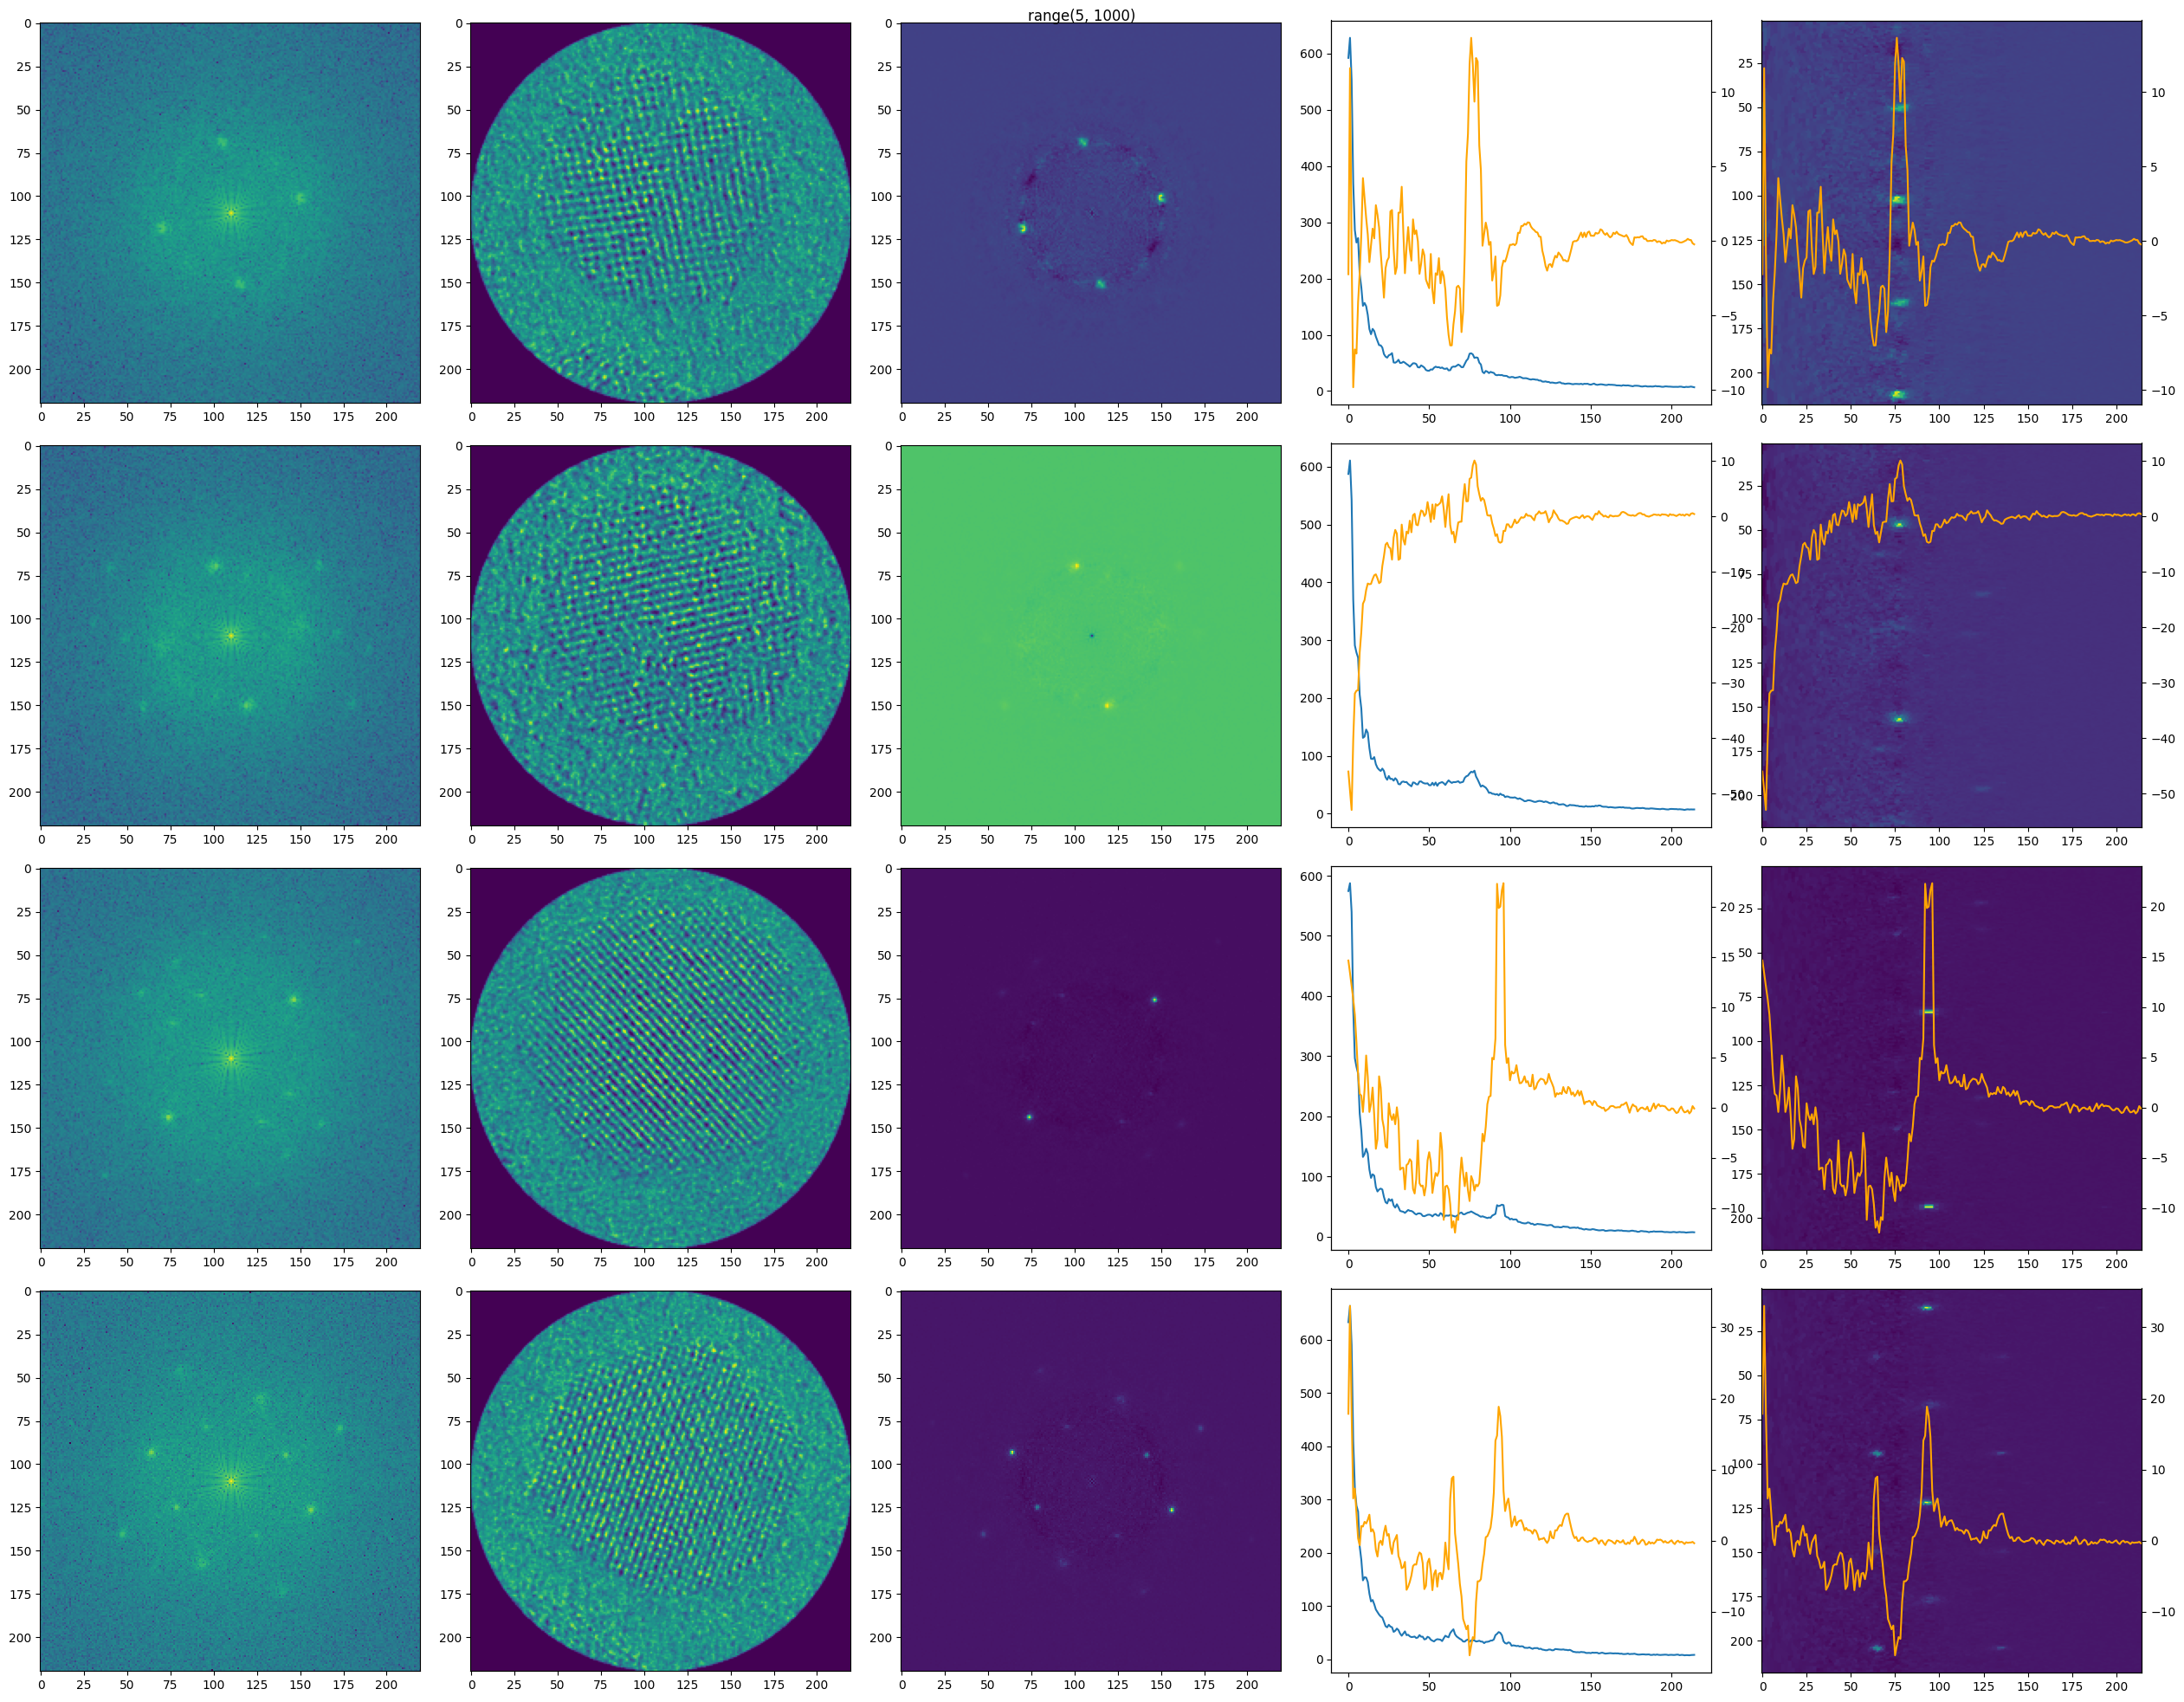

In [383]:
# For checking PCA done in ffts
n = range(5,1000)
sc = s.get_decomposition_model(n)

cropsoi = [6, 8, 10, 17]
fig,ax = plt.subplots(len(cropsoi), 5, figsize=(25,5*len(cropsoi)))
fig.suptitle(n)
fig.tight_layout()
row = 0
for amostra in cropsoi:
    data1 = s.data[amostra]
    tdata1 = np.fft.ifft2(np.fft.ifftshift(np.exp(np.log(data1) + 1j * np.angle(fshifts[amostra])))).real
    ax[row, 0].imshow(np.log(data1)) #, interpolation = 'nearest')
    ax[row, 1].imshow((tdata1))

    data2 = sc.data[amostra]
    ax[row, 2].imshow((data2))

    p1 = linearPolar(data1, (rscrop.shape[0]//sample_size, rscrop.shape[1]//sample_size), rscrop.shape[0]//sample_size, WARP_FILL_OUTLIERS)
    ai1 = np.mean((p1), axis=0).flatten()
    p2 = linearPolar(data2, (rscrop.shape[0]//sample_size, rscrop.shape[1]//sample_size), rscrop.shape[0]//sample_size, WARP_FILL_OUTLIERS)
    ai2 = np.mean((p2), axis=0).flatten()

    ax[row, 3].plot((ai1)[5:])
    ax5 = ax[row, 3].twinx()
    ax5.plot((ai2)[5:], color='orange')

    ax[row, 4].imshow(p2[:,5:])
    ax5 = ax[row, 4].twinx()
    ax5.plot((ai2)[5:], color='orange')

    row+=1